In [8]:
import torch 
from denoising_diffusion_pytorch import Unet , GaussianDiffusion, Trainer

In [9]:
model = Unet(
    dim = 64,
    dim_mults = (1,2,4,8)
).cuda()

In [10]:
diffusion = GaussianDiffusion(
    model,
    image_size = 128,
    timesteps = 1000
).cuda()

In [11]:
device = next(diffusion.parameters()).device  # get device of model
training_images = torch.randn(8,3,128,128).to(device)
loss = diffusion(training_images)
loss.backward()

In [12]:
sampled_images = diffusion.sample(batch_size=4)

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

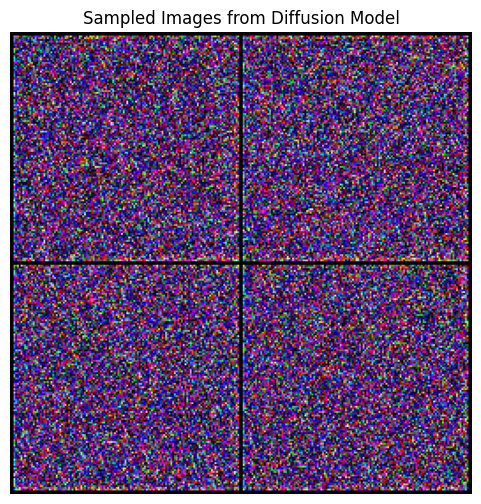

In [13]:
import matplotlib.pyplot as plt
import torchvision.utils as vutils

sampled_images = sampled_images.cpu().detach()
grid_img = vutils.make_grid(sampled_images, nrow=2)
plt.figure(figsize=(6, 6))
plt.axis("off")
plt.title("Sampled Images from Diffusion Model")
plt.imshow(grid_img.permute(1, 2, 0))  # Convert from CHW to HWC
plt.show()

In [14]:
# trainer = Trainer(
#     diffusion,
#     './data/MNIST_Images',
#     train_batch_size = 32,
#     train_lr = 2e-5,
#     train_num_steps = 700,
#     gradient_accumulate_every = 2,
#     ema_decay = 0.995,
#     amp = True
# )

# trainer.train()